In [37]:
%pylab inline
from networkanalysis.networkanalysis import *
from networkanalysis.experiments import *
import networkanalysis
networkanalysis.__version__

Populating the interactive namespace from numpy and matplotlib


/Users/admin/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt', 'plot', 'copy']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


u'0.3.4'

In [38]:
import seaborn as sbn

In [39]:
pG = PerturbationGraph()

In [40]:
pG.populate_pert_graph('summary_mbar.csv')

In [41]:
graph = pG.graph

In [42]:
print (np.sort(graph.nodes()))

['15' '16' '35' '36' '38' '39' '44' '45']


In [43]:
pG.compute_weighted_avg_paths('45')

In [44]:
ordered_keys = ['15', '16', '35', '36', '38', '39', '44', '45']

In [45]:
pG.format_free_energies(merge_BM=True,intermed_ID='INT', compound_order=ordered_keys)

In [46]:
stage2_DDG = pG.freeEnergyInKcal

In [47]:
stage2_DDG

[{'15': 0.99021074432952461, 'error': 0.94078350675320288},
 {'16': 1.3064725300857576, 'error': 0.93834653242588983},
 {'35': -0.52694058529565058, 'error': 0.99167177361181913},
 {'36': -1.0287133857959143, 'error': 0.990826866267006},
 {'38': 0.35723006195877077, 'error': 0.96655085309383815},
 {'39': 0.4231395633938852, 'error': 0.99166188192258742},
 {'44': 1.8442195169923161, 'error': 0.45875100948111702},
 {'45': -0.0, 'error': 0.0}]

In [48]:
experiments = ExperimentalData()

In [49]:
experiments.compute_DDG_from_IC50s('IC_50s.csv','45')

In [50]:
exp_list = experiments.freeEnergiesInKcal

In [51]:
print exp_list

[{'15': -1.3727119612189949, 'error': 0.41322747573364904}, {'error': 0.41322747573364904, '16': -1.2640189176651957}, {'35': -3.0499583546178397, 'error': 0.41322747573364904}, {'36': -3.2916809321896854, 'error': 0.41322747573364904}, {'38': -1.0925140195033931, 'error': 0.41322747573364904}, {'39': -0.8030730828723609, 'error': 0.41322747573364904}, {'44': -0.13302953401804746, 'error': 0.41322747573364904}, {'45': 0.0, 'error': 0.41322747573364904}]


In [52]:
pG.write_free_energies(stage2_DDG,'DDG.csv')
pG.write_free_energies(exp_list,'DDG_exp.csv')

## Statistics

In [53]:
from networkanalysis.stats import *

In [54]:
stats = freeEnergyStats()
stats.generate_statistics(stage2_DDG, exp_list, repeats=10000)

In [55]:
print "Experimental versus calculated statistics"
print "R : %.2f < %.2f < %.2f" %(stats.R_error[0],stats.R,stats.R_error[1])
print "MUE: %.2f < %.2f < %.2f" %(stats.mue_error[0],stats.mue,stats.mue_error[1])
print "R^2: %.2f < %.2f < %.2f" %(stats.R2_error[0],stats.R2,stats.R2_error[1])

Experimental versus calculated statistics
R : 0.45 < 0.52 < 0.63
MUE: 1.68 < 1.82 < 1.95
R^2: 0.21 < 0.30 < 0.39


In [56]:
stats = freeEnergyStats()
stats.generate_statistics(stage2_DDG, stage2_DDG, repeats=10000)

In [57]:
print "Calculated versus calculated statistics"
print "R : %.2f < %.2f < %.2f" %(stats.R_error[0],stats.R,stats.R_error[1])
print "MUE: %.2f < %.2f < %.2f" %(stats.mue_error[0],stats.mue,stats.mue_error[1])
print "R^2: %.2f < %.2f < %.2f" %(stats.R2_error[0],stats.R2,stats.R2_error[1])

Calculated versus calculated statistics
R : 0.72 < 0.76 < 0.85
MUE: 0.53 < 0.62 < 0.70
R^2: 0.52 < 0.60 < 0.72


In [58]:
stats = freeEnergyStats()
stats.generate_statistics(exp_list, exp_list, repeats=10000)

In [59]:
print "Experimental versus experimental statistics"
print "R : %.2f < %.2f < %.2f" %(stats.R_error[0],stats.R,stats.R_error[1])
print "MUE: %.2f < %.2f < %.2f" %(stats.mue_error[0],stats.mue,stats.mue_error[1])
print "R^2: %.2f < %.2f < %.2f" %(stats.R2_error[0],stats.R2,stats.R2_error[1])

Experimental versus experimental statistics
R : 0.95 < 0.95 < 0.97
MUE: 0.28 < 0.33 < 0.37
R^2: 0.89 < 0.91 < 0.94


## Plotting

In [60]:
stats = freeEnergyStats()
stats.generate_statistics(stage2_DDG, exp_list, repeats=10000)

In [61]:
from networkanalysis.plotting import *

In [62]:
plot = FreeEnergyPlotter(exp_list,stage2_DDG,compound_list=ordered_keys)

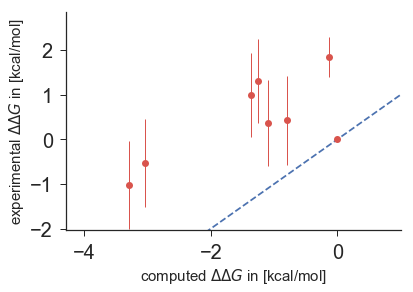

In [63]:
plot.plot_scatter_plot()

(<matplotlib.axes._subplots.AxesSubplot at 0x119124950>,
 <matplotlib.figure.Figure at 0x1197ebd10>)

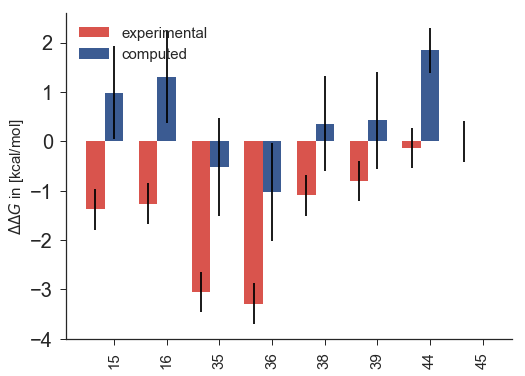

In [64]:
plot.plot_bar_plot()

In [65]:
scipy.stats.linregress(stats.data_exp,np.array(stats.data_comp)[:,0])

LinregressResult(slope=0.54570112943838478, intercept=1.171517946910019, rvalue=0.69798005693780762, pvalue=0.054214318129863881, stderr=0.22857057286451082)

## Perturbation of experimental and computed results

In [66]:
def generate_perturbation(exp_ddg):
    new_exp_dic = []
    for dic in exp_ddg:
        keys = dic.keys()
        if keys[0]=='error':
            err = dic[keys[0]]
            val = dic[keys[1]]
            compound = keys[1]
        else:
            err = dic[keys[1]]
            val = dic[keys[0]]
            compound = keys[0]
        if err !=0.0:
            new_val = np.random.normal(val, err)
        else:
            new_val = val
        new_exp_dic.append({'error':err, compound : new_val})
    return new_exp_dic

In [67]:
def bootstrap_compounds(c_list, exp_data, sim_data):
    R = []
    mue = []
    rmsd = []
    for x in range(1000):
        indeces = np.random.randint(len(c_list), size=len(c_list))
        new_exp_list = []
        new_comp_list  = []
        for i in indeces:
            new_exp_list.append(exp_data[i])
            new_comp_list.append(sim_data[i])

        #exp_data = generate_new_exp_data(exp_data)
        new_exp_list = convert_to_array(new_exp_list)
        new_comp_list = convert_to_array(new_comp_list)
        R.append(scipy.stats.pearsonr(new_exp_list[:,0],new_comp_list[:,0])[0])
        rmsd.append(compute_rmsd(new_comp_list[:,0],new_exp_list[:,0]))
        #mue.append(calculate_mue(new_exp_list,new_comp_list[:,0]))
    return R, mue, rmsd

In [68]:
def convert_to_array(dic_list):
    new_list = []
    for item in dic_list:
        keys = item.keys()
        if keys[0] == 'error':
            new_list.append(np.array([item[keys[1]], item[keys[0]]]))
        else:
            new_list.append(np.array([item[keys[0]], item[keys[1]]]))
    return np.array(new_list)

In [69]:
def compute_rmsd(estimate, value):
    deviation = sqrt(np.sum((estimate - value)**2)/len(perturb_exp_ddg))
    return deviation

In [70]:
mean_R = []
std_R = []
mean_mue = []
std_mue = []
mean_rmsd = []
std_rmsd = []
for i in xrange(100):
    perturb_exp_ddg = generate_perturbation(exp_list)
    R, mue, rmsd = bootstrap_compounds(ordered_keys, exp_list, perturb_exp_ddg)
    mean_R.append(mean(R))
    std_R.append(std(R))
    std_mue.append(std(mue))
    mean_mue.append(mean(mue))
    std_rmsd.append(std(rmsd))
    mean_rmsd.append(mean(rmsd))

In [71]:
print "R is: %f ± %f " %( np.mean(mean_R), np.std(std_R))
print "rmsd is: %f ± %f " %( np.mean(mean_rmsd), np.std(std_rmsd))

R is: 0.940311 ± 0.038043 
rmsd is: 0.400818 ± 0.033813 
